In [1]:
import pandas as pd
import re 

# Gensim for topic modeling
import gensim
from gensim.utils import simple_preprocess
from gensim import matutils, models
import gensim.corpora as corpora
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
import scipy.sparse

# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shawn.teo.2019\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
ori_df = pd.read_csv('train_dataset_all.csv')

print(ori_df.shape)
ori_df.head()

df = ori_df.sample(n=5000, random_state=999)
print(df.shape)

C:\Users\shawn.teo.2019\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(78099, 16)
(5000, 16)


In [3]:
# Convert to list
data = df.review.values.tolist()


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

C:\Users\shawn.teo.2019\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# # Let's start with 2 topics.
# lda_model = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
# lda_model.print_topics()

C:\Users\shawn.teo.2019\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Convert to list
data = df.review.values.tolist()
data[:5]
# Remove @mentions 



C:\Users\shawn.teo.2019\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Yep, this is comfort food I do believe.  I fried the bacon til CRISP but not burned.  I added not butter as I felt the fat from the pig was enough.  Used curly egg noodles.  Plenty left over for lunch.  Thanks Mr. Hixson.',
 'Oh girl this is a keeper!  I skipped the walnuts and the flour, and used an egg white and sugar substitute.  Topped with sugar free syrup.  Awesome awesome!',
 'I used fat free cottage cheese & granola. Wonderful!',
 'This is a easy side dish that looks as good as it tastes.  I made it with a red pepper and together with the green onions, it was very festive!',
 'I was looking for a different way to jazz up plain canned green beans.  Some of the other reviewers said these beans were "tangy", so I used only half the amount of mustard and worcestershire sauce.  I didn\'t marinate them as long as stated because I was in a hurry, but we really enjoyed them! Thanks LonghornMama!']

In [6]:
# Remove urls (remove a word starting with http)
data = [re.sub(r'@\w+', '', sent) for sent in data]
data = [re.sub(r'http\S+', '', sent) for sent in data]

nltk.download('punkt')
nltk.download('stopwords')

# set stop words
stop_words = stopwords.words('english')
stop_words.extend(["thank","thanks","great","way","dh"])
stop_words.extend(['thank', 'bit', 'recipe', 'from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'lot', 'lack', 'make', 'di', 'havena', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', 'from', 'subject', 're', 'edu', 'use', 'amp', 'een', 'ia', 'es', 'ich', 'das', 'ita', 'ich', 'das', 'der', 'aŒ'])


newdata = []
for sent in data:

    # tokenize
    tokenized_review = word_tokenize(sent)
    # standardize to lower case
    lower_review = [w.lower() for w in tokenized_review]
    # keep token words which are text
    text_words_only = [w for w in lower_review if re.search('^[a-z]+$',w)]
    text_stopremoved = [w for w in text_words_only if w not in stop_words]
    text_joined = " ".join(text_stopremoved)
    newdata.append(text_joined)

newdata[:5]

C:\Users\shawn.teo.2019\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shawn.teo.2019\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shawn.teo.2019\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['yep comfort food believe fried bacon til crisp burned added butter felt fat pig enough used curly egg noodles plenty left lunch hixson',
 'oh girl keeper skipped walnuts flour used egg white sugar substitute topped sugar free syrup awesome awesome',
 'used fat free cottage cheese granola wonderful',
 'easy side dish looks tastes made red pepper together green onions festive',
 'looking different jazz plain canned green beans reviewers said beans tangy used half amount mustard worcestershire sauce marinate long stated hurry really enjoyed longhornmama']

In [7]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(newdata))

print(data_words[:1])

C:\Users\shawn.teo.2019\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['yep', 'comfort', 'food', 'believe', 'fried', 'bacon', 'til', 'crisp', 'burned', 'added', 'butter', 'felt', 'fat', 'pig', 'enough', 'used', 'curly', 'egg', 'noodles', 'plenty', 'left', 'lunch', 'hixson']]


In [8]:
# Build the bigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10) # higher threshold fewer phrases.

# Faster way to get a sentence clubbed as a bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# Form Bigrams
data_words_bigrams = make_bigrams(data_words)


C:\Users\shawn.teo.2019\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
def lemmatization(texts, allowed_postags=['NOUN']):
    """"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component
# For normal use
# !python -m spacy download en_core_web_sm
# nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# For Colab use
import en_core_web_sm
nlp = en_core_web_sm.load()

print("Before Lemmatization:", data_words_bigrams[:1])

# Do lemmatization keeping only noun
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'PROPN',"ADJ"])

print("After Lemmatization: ", data_lemmatized[:1])


C:\Users\shawn.teo.2019\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Before Lemmatization: [['yep', 'comfort_food', 'believe', 'fried', 'bacon', 'til', 'crisp', 'burned', 'added', 'butter', 'felt', 'fat', 'pig', 'enough', 'used', 'curly', 'egg_noodles', 'plenty', 'left', 'lunch', 'hixson']]
After Lemmatization:  [['comfort_food', 'bacon', 'crisp', 'butter', 'fat', 'pig', 'curly', 'egg_noodle', 'plenty', 'lunch', 'hixson']]


In [10]:
# Remove urls (remove a word starting with http)
data = [re.sub(r'@\w+', '', sent) for sent in data]
data = [re.sub(r'http\S+', '', sent) for sent in data]

nltk.download('punkt')
nltk.download('stopwords')

# set stop words
stop_words = stopwords.words('english')
stop_words.extend(["thank","thanks","great","way","dh","wonderful"])
stop_words.extend(['thank', 'bit', 'recipe', 'from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'lot', 'lack', 'make', 'di', 'havena', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', 'from', 'subject', 're', 'edu', 'use', 'amp', 'een', 'ia', 'es', 'ich', 'das', 'ita', 'ich', 'das', 'der', 'aŒ'])


newdata = []
for data_sent in data_lemmatized:

    text_stopremoved = [w for w in data_sent if w not in stop_words]
    newdata.append(text_stopremoved)
# newdata[:5]

C:\Users\shawn.teo.2019\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shawn.teo.2019\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shawn.teo.2019\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Create Dictionary
id2word = corpora.Dictionary(newdata)
id2word.filter_extremes(no_below=1.5, no_above=0.8) # this will filter out words that are less frequen

# Create Corpus
texts = newdata

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

C:\Users\shawn.teo.2019\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]]


In [12]:
print(id2word[0], id2word[1], id2word[2], id2word[3], id2word[4])


bacon butter comfort_food crisp curly


C:\Users\shawn.teo.2019\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# lvnrlfvknskblvn rkslvn

In [13]:
# Build LDA model

lda_model = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, passes=10)
lda_model.print_topics()

C:\Users\shawn.teo.2019\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.027*"sauce" + 0.016*"chicken" + 0.011*"love" + 0.010*"simple" + 0.009*"easy" + 0.009*"flavour" + 0.009*"excellent" + 0.009*"delicious" + 0.008*"tasty" + 0.008*"grill"'),
 (1,
  '0.033*"cake" + 0.017*"flavor" + 0.014*"pan" + 0.013*"little" + 0.013*"cookie" + 0.012*"dough" + 0.011*"delicious" + 0.010*"butter" + 0.010*"roll" + 0.010*"time"'),
 (2,
  '0.015*"flavor" + 0.013*"delicious" + 0.012*"side_dish" + 0.011*"salsa" + 0.010*"taste" + 0.010*"tasty" + 0.010*"dish" + 0.009*"easy" + 0.009*"potato" + 0.008*"sweet"'),
 (3,
  '0.032*"cup" + 0.019*"flour" + 0.013*"muffin" + 0.013*"sugar" + 0.011*"little" + 0.010*"half" + 0.008*"time" + 0.008*"tasty" + 0.008*"cinnamon" + 0.007*"easy"'),
 (4,
  '0.025*"garlic" + 0.022*"flavor" + 0.021*"cheese" + 0.021*"meat" + 0.019*"sauce" + 0.015*"fresh" + 0.014*"sandwich" + 0.014*"steak" + 0.014*"love" + 0.014*"tomato"'),
 (5,
  '0.029*"chicken" + 0.020*"soup" + 0.019*"sauce" + 0.014*"dish" + 0.013*"easy" + 0.012*"rice" + 0.010*"little" + 0.010*"ti

In [14]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=newdata, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\shawn.teo.2019\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.567150154573725

Coherence Score:  0.30833787590721917


In [15]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\shawn.teo.2019\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.101639 -0.031800       1        1  18.854869
0      0.109937 -0.032288       2        1  10.338655
3     -0.100691 -0.142211       3        1  10.251776
2      0.042087  0.078566       4        1   9.826824
7      0.058519 -0.002806       5        1   9.326475
1     -0.168891 -0.051185       6        1   9.160386
6      0.035051  0.047628       7        1   9.081827
8     -0.176039 -0.081615       8        1   8.925713
4      0.208890 -0.036085       9        1   8.310692
9     -0.110502  0.251796      10        1   5.922783, topic_info=           Term        Freq       Total Category  logprob  loglift
98      chicken  486.000000  486.000000  Default  30.0000  30.0000
204       sauce  563.000000  563.000000  Default  29.0000  29.0000
337        cake  214.000000  214.000000  Default  28.0000  28.0000
125         cup  344.000000  344.000000  Default  27.0000  27.0000
189       bread  284.000000  284.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
44   ingredient   28.618088  276.491125  Topic10  -4.9392   0.5582
24         easy   29.755916  527.990196  Topic10  -4.9002  -0.0497
173       lemon   25.510987  139.150670  Topic10  -5.0541   1.1299
1        butter   26.206263  211.969341  Topic10  -5.0272   0.7359
16        sugar   25.062836  254.384268  Topic10  -5.0718   0.5089

[730 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1563      2  0.900840      abit
1198      1  0.013095  addition
1198      2  0.229155  addition
1198      3  0.144040  addition
1198      4  0.124398  addition
...     ...       ...       ...
123       3  0.202056     yummy
123       5  0.202056     yummy
123       6  0.129523     yummy
123       7  0.212418     yummy
123       9  0.051809     yummy

[1556 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 4, 3, 8, 2, 7, 9, 5, 10])

In [16]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['dominant_topic', 'topic_perc_contrib', 'keywords']
    
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus)
df_topic_sents_keywords.head()


C:\Users\shawn.teo.2019\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,dominant_topic,topic_perc_contrib,keywords
0,5.0,0.4039,"chicken, soup, sauce, dish, easy, rice, little..."
1,7.0,0.4306,"dish, tomato, love, taste, flavor, cheese, fre..."
2,4.0,0.4799,"garlic, flavor, cheese, meat, sauce, fresh, sa..."
3,2.0,0.3319,"flavor, delicious, side_dish, salsa, taste, ta..."
4,6.0,0.4585,"egg, flavor, little, delicious, dish, salad, o..."


# pewiofhiofwheh

C:\Users\shawn.teo.2019\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


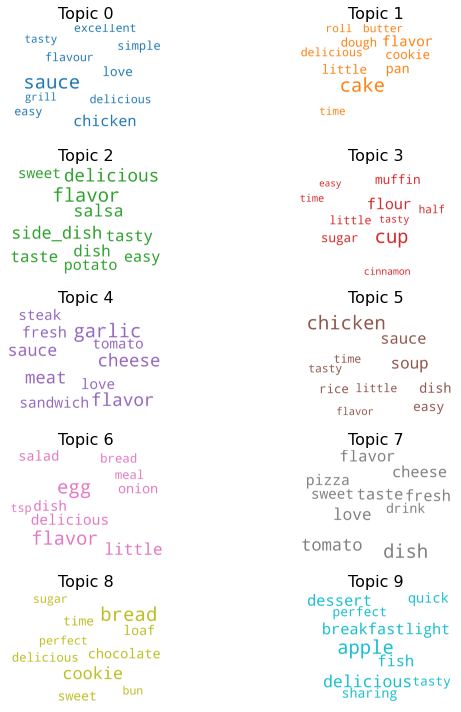

In [17]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5,2, figsize=(10,10), sharex=True, sharey=True)


for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)

    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [18]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_lda = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('dominant_topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_lda = pd.concat([sent_topics_sorteddf_lda, 
                                             grp.sort_values(['topic_perc_contrib'], ascending=[0]).head(3)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_lda.reset_index(drop=True, inplace=True)

# # Show
sent_topics_sorteddf_lda

C:\Users\shawn.teo.2019\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,dominant_topic,topic_perc_contrib,keywords
0,0.0,0.9654,"sauce, chicken, love, simple, easy, flavour, e..."
1,0.0,0.9640,"sauce, chicken, love, simple, easy, flavour, e..."
2,0.0,0.9591,"sauce, chicken, love, simple, easy, flavour, e..."
3,1.0,0.9667,"cake, flavor, pan, little, cookie, dough, deli..."
4,1.0,0.9591,"cake, flavor, pan, little, cookie, dough, deli..."
5,1.0,0.9470,"cake, flavor, pan, little, cookie, dough, deli..."
6,2.0,0.9750,"flavor, delicious, side_dish, salsa, taste, ta..."
7,2.0,0.9640,"flavor, delicious, side_dish, salsa, taste, ta..."
8,2.0,0.9640,"flavor, delicious, side_dish, salsa, taste, ta..."
9,3.0,0.9625,"cup, flour, muffin, sugar, little, half, time,..."


C:\Users\shawn.teo.2019\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-19-bdac23c98665>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-19-bdac23c98665>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-19-bdac23c98665>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-inp

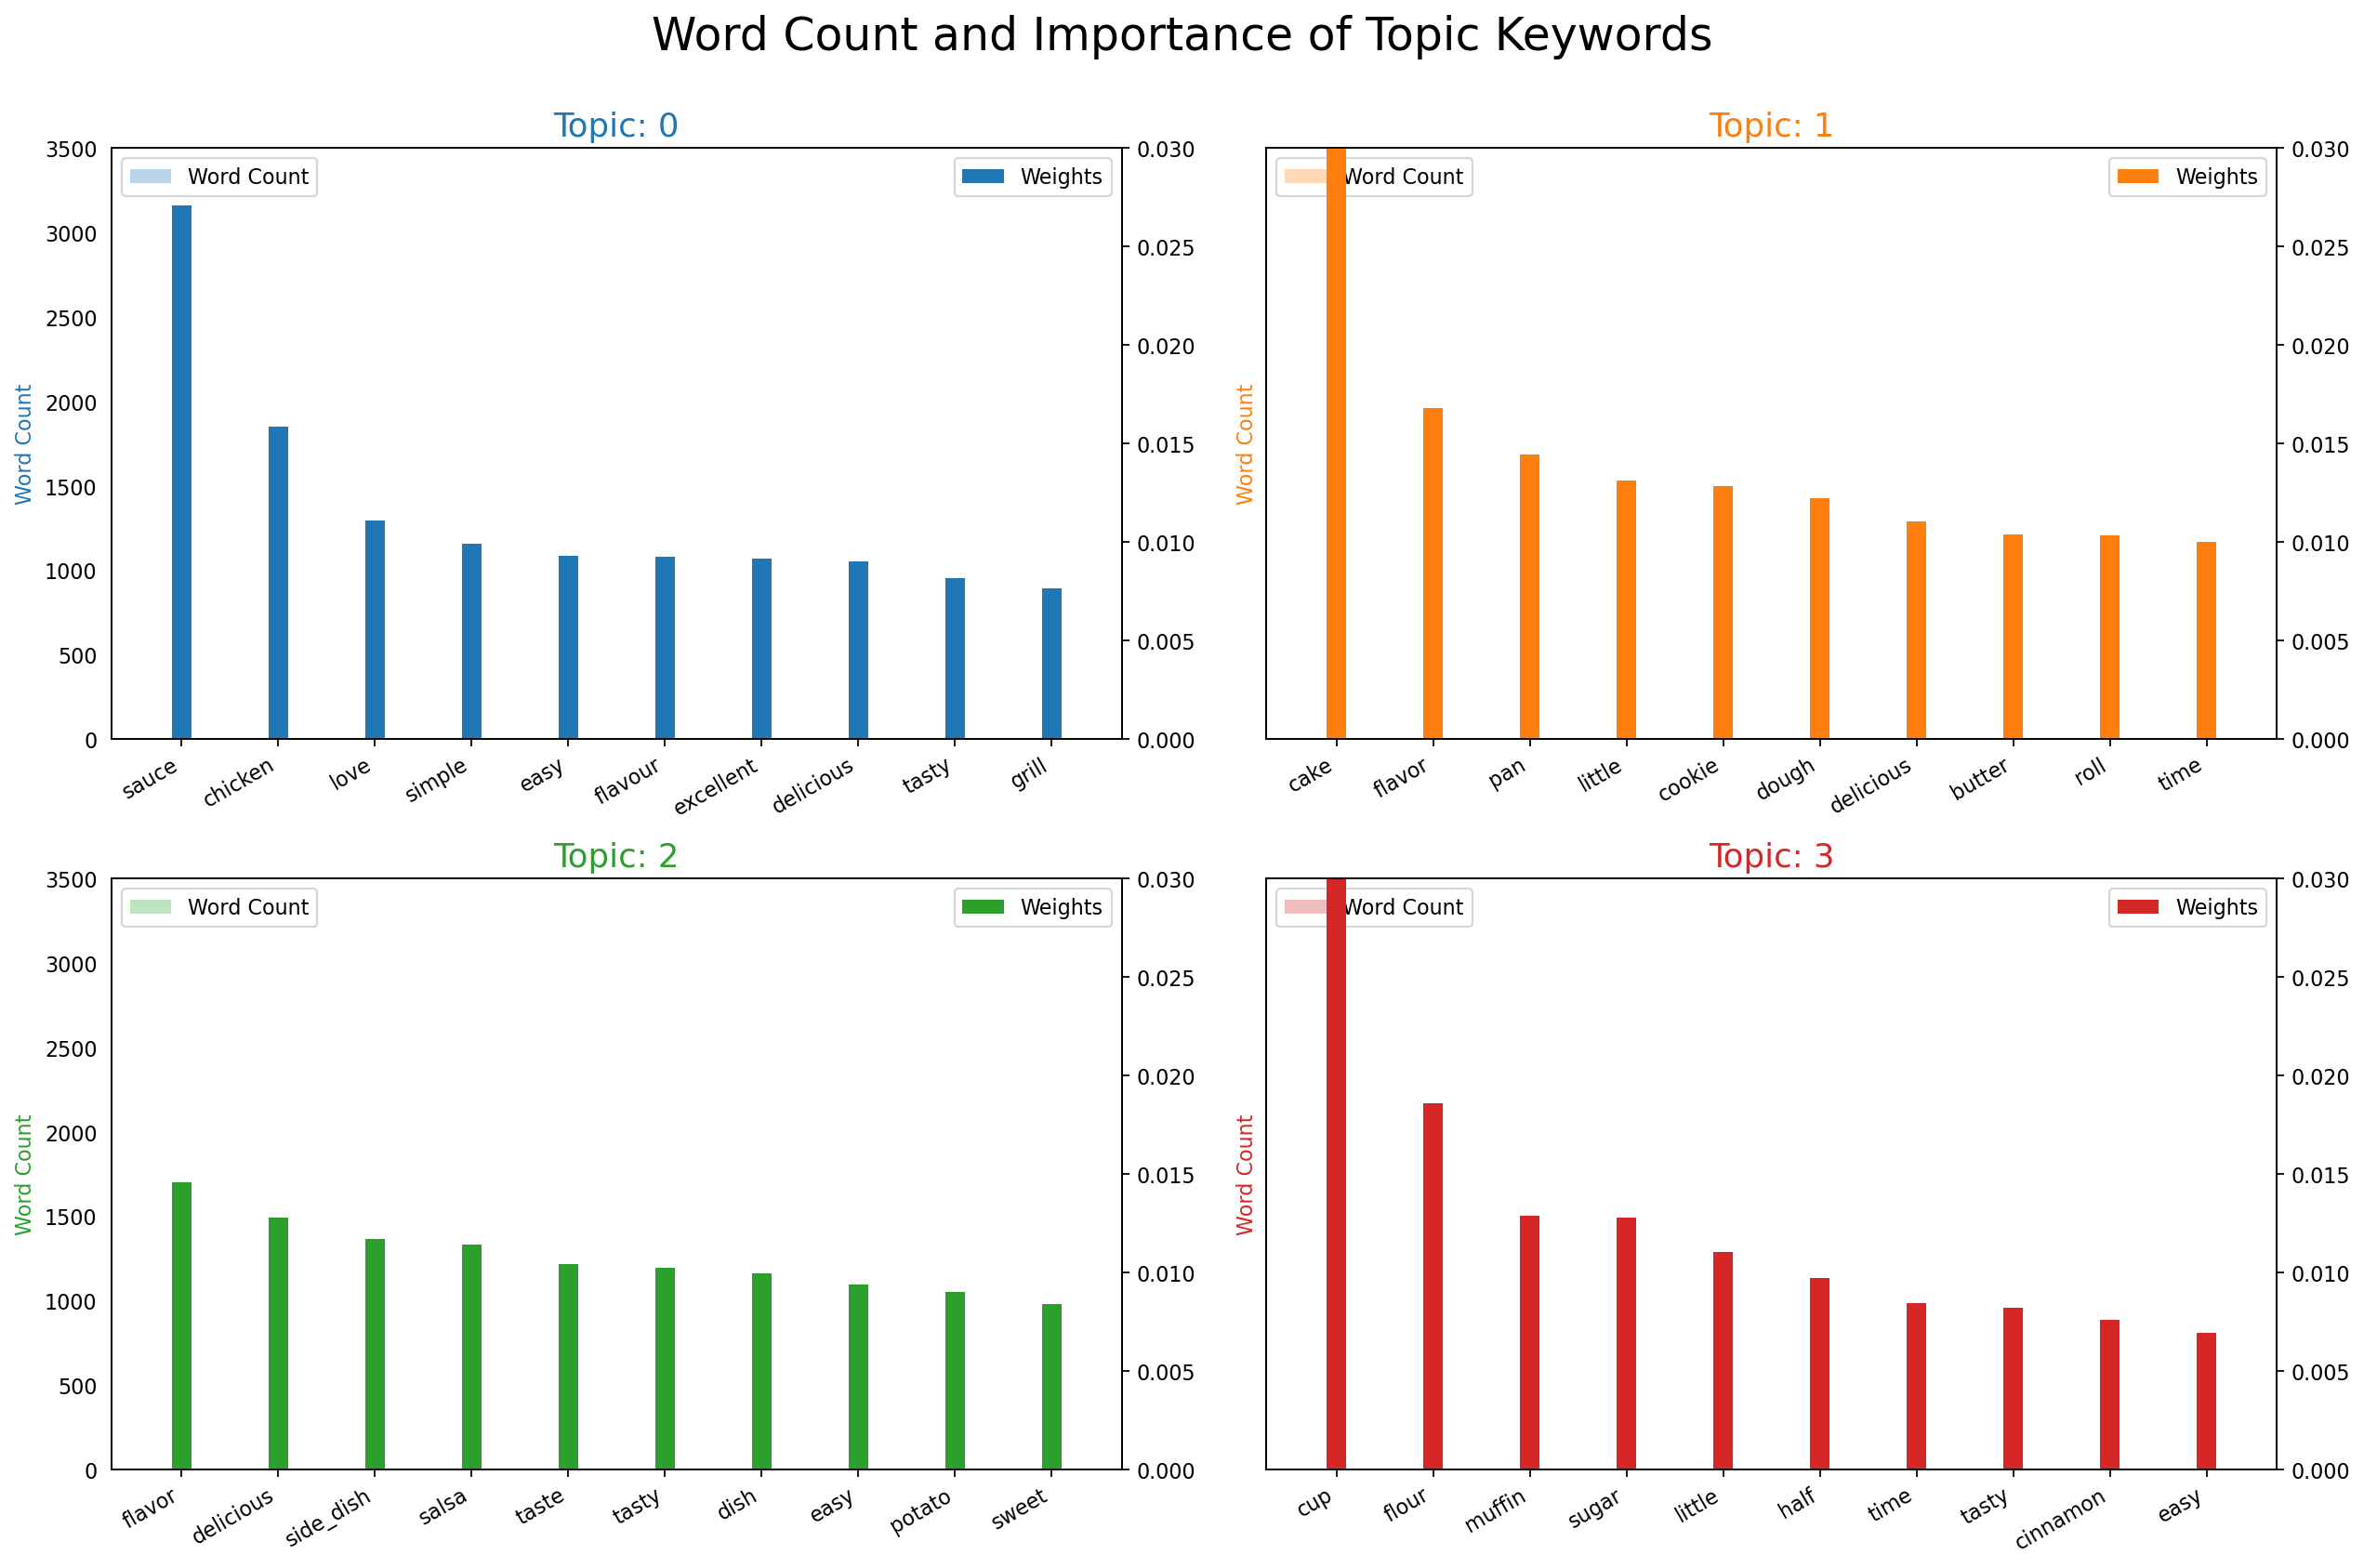

In [19]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in df for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [20]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

C:\Users\shawn.teo.2019\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: cannot unpack non-iterable int object